# DBSCAN Clustering untuk mengidentifikasi Outliers

In [1]:
import pandas as pd
from pylab import rcParams
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [2]:
#baca datasetsnya

malls_df = pd.read_csv(r"D:\SEMESTER3\DATAANAYSIS\tugas kelompok\Mall_Customers.csv",sep=",")
malls_df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


In [3]:
malls_df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
#kita harus check apakah ada values null di datanya
malls_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
malls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
malls_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
malls_df.shape

(200, 5)

## Exploratory Data Analyst

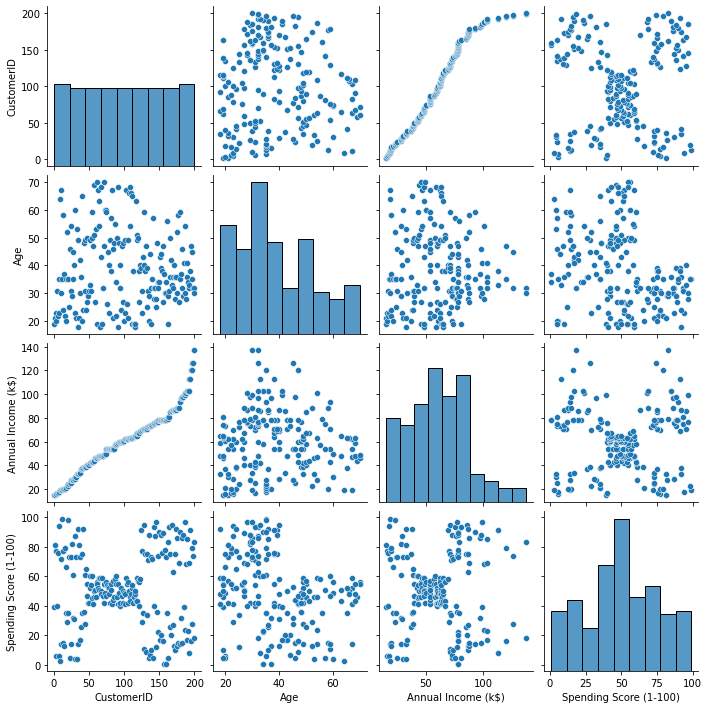

In [8]:
sns.pairplot(malls_df)

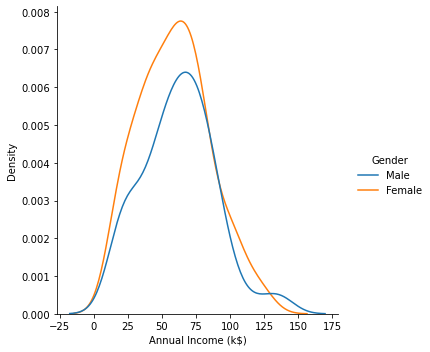

In [9]:
sns.displot(malls_df, x="Annual Income (k$)", hue="Gender", kind="kde")
#untuk distribusinya bisa kami bilang gaussian karena ekor kiri dan kanannnya masih tergolong seimbang.

C:\Users\Darren\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Darren\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Darren\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Darren\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


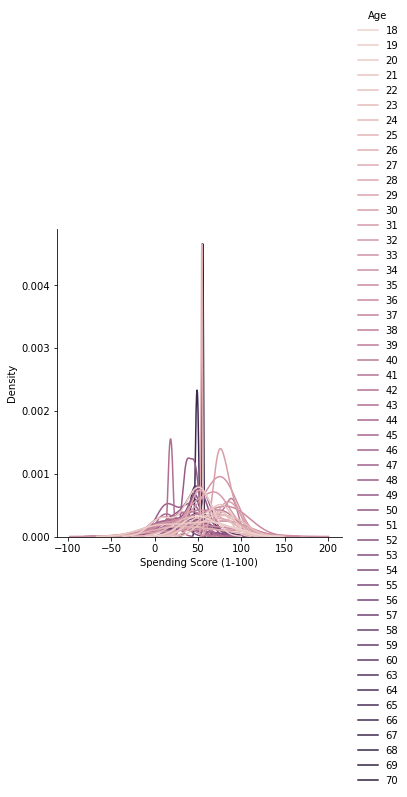

In [10]:
sns.displot(malls_df, x="Spending Score (1-100)", hue="Age", kind="kde")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

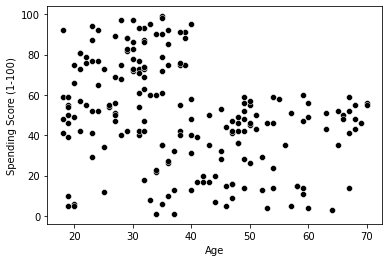

In [11]:
sns.scatterplot(data=malls_df, x="Age", y="Spending Score (1-100)", color="black")
#merupakan scatter plot antara umur dengan score spending

<AxesSubplot:>

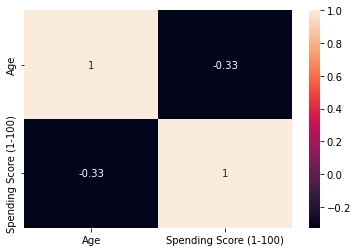

In [12]:
sns.heatmap(malls_df[['Age','Gender','Spending Score (1-100)']].corr(), annot=True)
#kesimpulannya adalah bahwa 

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Gender'>

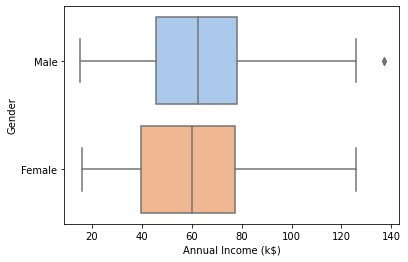

In [13]:
colors = sns.color_palette('pastel')
sns.boxplot(x="Annual Income (k$)", y="Gender", data=malls_df, palette=colors)
#terdapat 1 outlier pada Gender Male yang berarti ada noise didalamnya

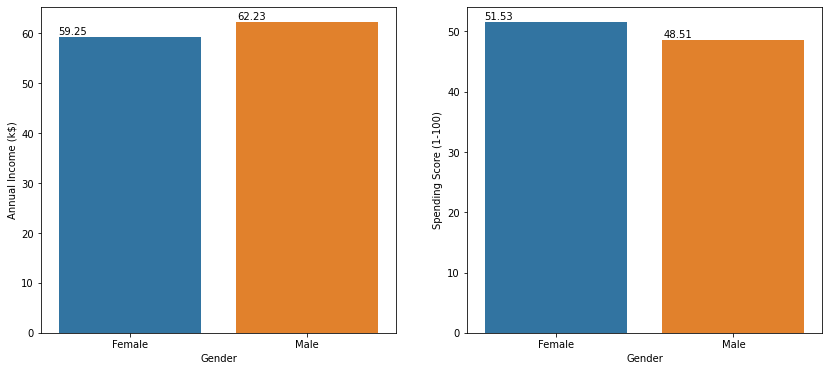

In [14]:
#menganalisis 2 varible secara bersamaan(Bivariate analysis)
#ini visualisasi pertama
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
cluster_type = malls_df.groupby(['Gender'])['Annual Income (k$)'].mean().reset_index()
ax=sns.barplot(x = 'Gender', y='Annual Income (k$)', data=cluster_type)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.subplot(1,2,2)
cluster_type = malls_df.groupby(['Gender'])['Spending Score (1-100)'].mean().reset_index()
ax=sns.barplot(x = 'Gender', y='Spending Score (1-100)', data=cluster_type)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

In [15]:
#bining umur dari para customers
#bining merupakan proses untuk mengelompokkan data menjadi bagian yang lebih kecil, dalam kasus ini kita ingin melihat jangkauan umur dari customer pada saat berada di mall

binning = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
range_ = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35',
        '35-40','40-45','45-50','50-55','55-60','60-65','65-70','70+']

malls_df['Range Umur Customers mengunjungi Mall']=pd.cut(malls_df['Age'], binning,labels=range_)

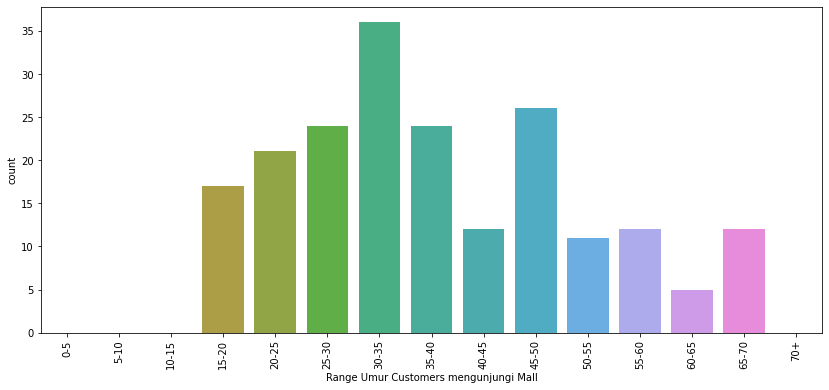

In [16]:
#bar plot
plt.figure(figsize=(14,6))
bar=sns.countplot(x="Range Umur Customers mengunjungi Mall", data=malls_df)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

#kesimpulannya adalah bahwa umur 30-35 yang sering mengunjungi mall daripada umur umur lain

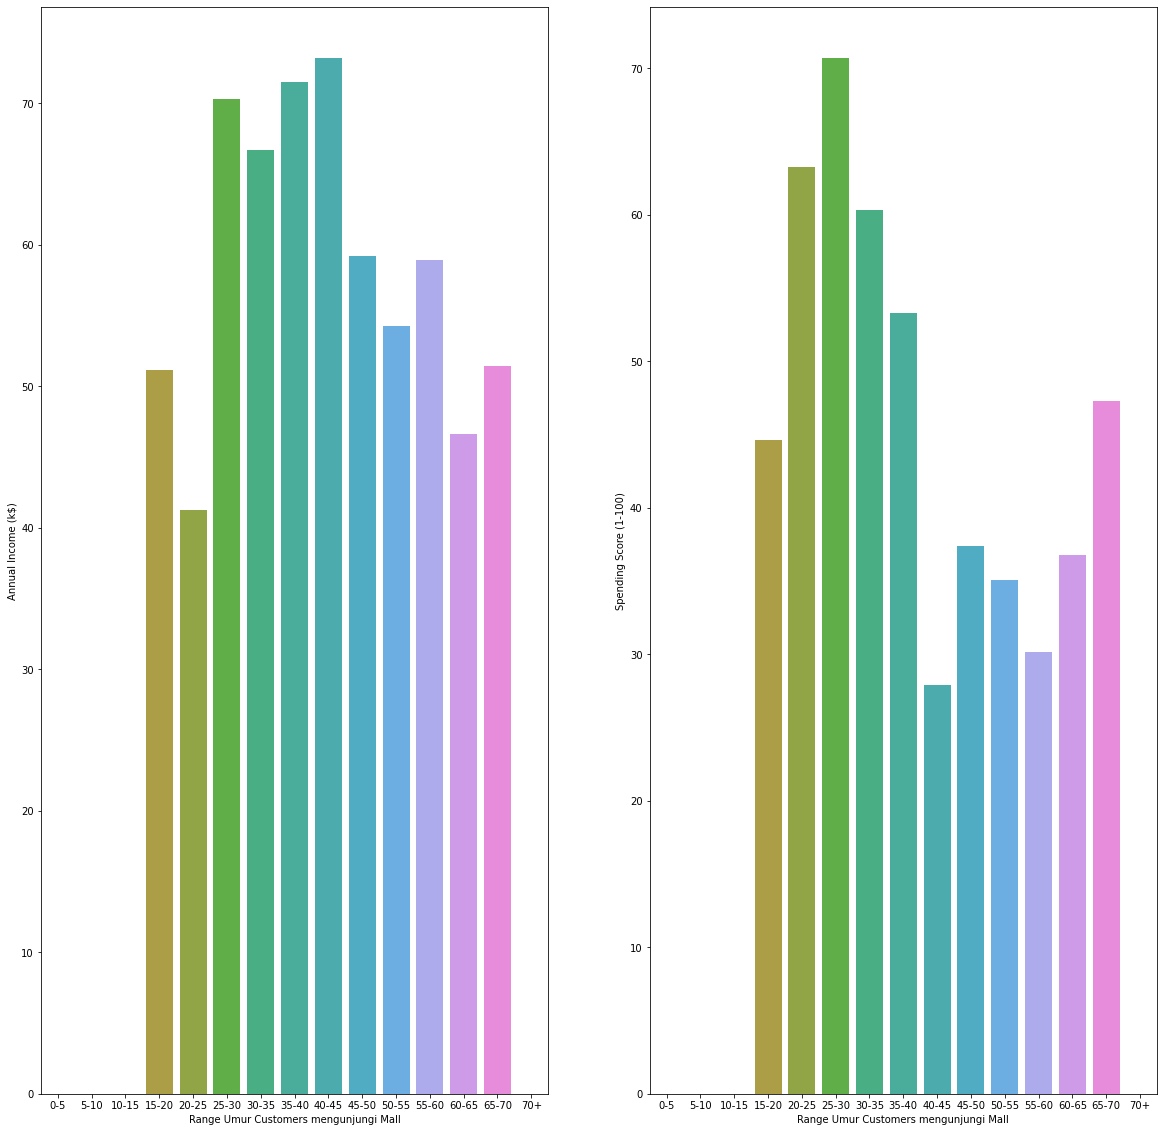

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
tipe_cluster = malls_df.groupby(['Range Umur Customers mengunjungi Mall'])['Annual Income (k$)'].mean().reset_index()
sns.barplot(x = 'Range Umur Customers mengunjungi Mall', y='Annual Income (k$)', data=tipe_cluster)
plt.subplot(1,2,2)
tipe_cluster = malls_df.groupby(['Range Umur Customers mengunjungi Mall'])['Spending Score (1-100)'].mean().reset_index()
sns.barplot(x = 'Range Umur Customers mengunjungi Mall', y='Spending Score (1-100)', data=tipe_cluster)
plt.show()

In [18]:
malls_df.drop('Range Umur Customers mengunjungi Mall',axis=1,inplace=True)
malls_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### DBSCAN clustering untuk identifikasi outliers
#### train model kita dan identifikasi outliers

In [19]:
### DBSCAN clustering untuk identifikasi outliers
#### train model kita dan identifikasi outliers

df = malls_df.iloc[:, [3,4]].values

In [20]:
df

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

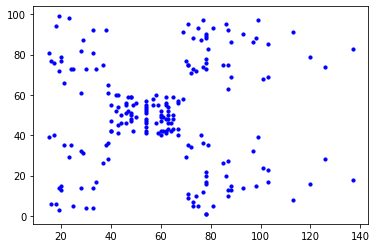

In [21]:
plt.scatter(df[:,0], df[:,1], s=10, c="blue")
#terlihat banyak sekali data yang tersebar dan kita akan lanjut ke proses kmean

C:\Users\Darren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


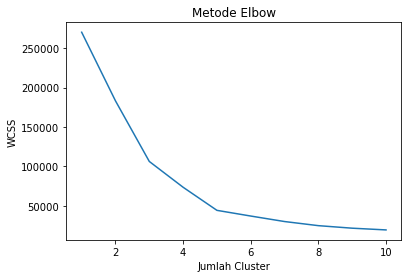

In [22]:
#Kmeans
#WCSS merupakan jarak pertambahan squared antara tiap point dan ditengah cluster.nah ketika kita plot WCSS dengan K-value maka plotnya angan seperti siku tangan.
#kalau jumlah cluster meningkat maka nilai WCSS akan berkurang. Nilai WCSS paling besar ketiak K = 1.
wcss = []
#ngejalanin jumlah cluster sebanyak 10 kali, dan akan run ke 10kalinya
for i in range (1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter=300, n_init=10) #run max 300 tidak bisa lebih 
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Metode Elbow")
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.show()
    
    
#kesimpulan nilai K kita sekarang adalah 5, dan merupakan angka optimal cluster.

In [23]:
#minimum_samples merupakan sample minimum yang perlu terlihat di dalam lingkaran cluster,dalam hal ini minsamplesnya adalah 5
#epsilon merupakan radius objek
model = DBSCAN(eps=5, min_samples=5)

In [24]:
labels= model.fit_predict(df)

In [25]:
np.unique(labels)
#-1 bukan cluster, dihasil ini terdapat sebuah noise yakni -1
#angka dibawah merupakan hasil cluster yang di run

array([-1,  0,  1,  2,  3,  4], dtype=int64)

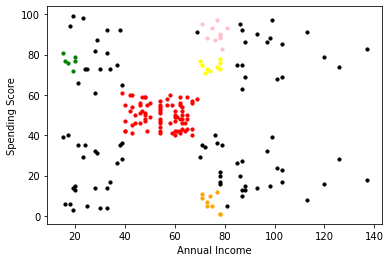

In [26]:
#Visualisasi clusters
plt.scatter(df[labels==-1, 0], df[labels==-1,1],s=10, c="black")

plt.scatter(df[labels==0, 0], df[labels==0,1],s=10, c="green")
plt.scatter(df[labels==1, 0], df[labels==1,1],s=10, c="red")
plt.scatter(df[labels==2, 0], df[labels==2,1],s=10, c="yellow")
plt.scatter(df[labels==3, 0], df[labels==3,1],s=10, c="orange")
plt.scatter(df[labels==4, 0], df[labels==4,1],s=10, c="pink")
plt.scatter(df[labels==5, 0], df[labels==5,1],s=10, c="blue")
plt.scatter(df[labels==6, 0], df[labels==6,1],s=10, c="brown")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


#kesimpulan dari clusters ini adalah 
#Cluster dengan warna merah merupakan kerapatannya tinggi.
#Cluster hitam bisa dibilang sebagai noise karena tingkat kerapatannya paling rendah dari antara yang lain.
#ciri khas DBSCAN adalah objek sebuah cluster harus lebih rapat daripada cluster dalam 1 area dalam hal ini yang dimaksud adalah cluster merah. 